# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/veeralakrishna/froth-flotation/data


Import the necessary libraries and create your dataframe(s).

There are 2 files I will be working with: feed.csv and flotation.csv. I will clean data before joining 2 files into one df. There are also constraints to the process outlined below. Data will be cleaned according to the constraints.

Constraint condition                       Bound Value
--------------------------------------------------------
Minimum sum of airflow for all columns        1490
Min starch and Amina flow combined            1000
Airflow bound                               (220,350)
Level Bound                                 (150,750)
Amina Bound                                 (250,700)
Pulp Flow bound                             (370,415)
pH bound                                    (8.75,10.8)
Density Bound                               (1.5,1.85)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_feed=pd.read_csv("feed.csv")
df_feed.head()


,Unnamed: 0,X1,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
0,1,0.0,2017-03-10 01:02:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,66.493242,1.31
1,2,1.0,2017-03-10 01:02:20,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,66.853733,1.31
2,3,2.0,2017-03-10 01:02:40,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,64.773804,1.31
3,4,3.0,2017-03-10 01:03:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,68.550271,1.31
4,5,4.0,2017-03-10 01:03:20,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,65.116564,1.31


In [3]:
#I will reduce records down to every hour. 
#Record at index(0) starts at 01:02:00, next hour will be at index(180) at 02:02:00 etc.
#I will remove all records that have remainders not equal to 0 when index divided by 180.

df_feed.drop(df_feed[df_feed.index%180!=0].index, inplace=True)

In [4]:
df_feed.head()

,Unnamed: 0,X1,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
0,1,0.0,2017-03-10 01:02:00,55.2,16.98,3019.53,557.434,395.713,10.06640,1.74000,66.493242,1.31
180,181,180.0,2017-03-10 02:02:00,55.2,16.98,3205.08,535.553,398.086,10.15540,1.66291,68.395566,1.11
360,361,360.0,2017-03-10 03:02:00,55.2,16.98,3391.21,584.900,401.016,10.08240,1.70771,68.218450,1.27
540,541,540.0,2017-03-10 04:02:00,55.2,16.98,3120.31,577.850,407.344,9.94174,1.72059,64.230421,1.36
720,721,720.0,2017-03-10 05:02:00,55.2,16.98,3267.58,608.459,394.658,9.84297,1.76000,66.938356,1.34


In [5]:
df_feed.shape

(3278, 12)

I will do the same for flotation.csv file before merging 2 dfs together

In [6]:
df_flotation=pd.read_csv("flotation.csv")
df_flotation.head()

,Unnamed: 0,X1,date,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,1,0.0,2017-03-10 01:02:00,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
1,2,1.0,2017-03-10 01:02:20,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075
2,3,2.0,2017-03-10 01:02:40,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567
3,4,3.0,2017-03-10 01:03:00,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669
4,5,4.0,2017-03-10 01:03:20,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679


In [7]:
df_flotation.drop(df_flotation[df_flotation.index%180!=0].index, inplace=True)
df_flotation.head()

,Unnamed: 0,X1,date,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,1,0.0,2017-03-10 01:02:00,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
180,181,180.0,2017-03-10 02:02:00,249.510,251.675,251.027,295.096,306.4,250.609,250.280,445.935,456.922,432.418,449.432,445.525,479.214,456.500
360,361,360.0,2017-03-10 03:02:00,248.807,248.379,248.939,295.096,306.4,250.269,251.576,444.584,422.540,448.154,464.353,447.508,461.574,440.993
540,541,540.0,2017-03-10 04:02:00,248.533,251.246,248.511,295.096,306.4,245.808,246.654,480.819,457.199,473.910,444.686,458.362,477.702,505.303
720,721,720.0,2017-03-10 05:02:00,249.598,253.114,251.807,295.096,306.4,249.719,248.632,526.739,568.244,545.166,525.550,547.031,558.323,553.193


In [8]:
#rename columns
df_flotation.rename(columns={'Flotation Column 01 Air Flow':'fc01_air_flow','Flotation Column 02 Air Flow':'fc02_air_flow','Flotation Column 03 Air Flow':'fc03_air_flow','Flotation Column 04 Air Flow':'fc04_air_flow','Flotation Column 05 Air Flow':'fc05_air_flow','Flotation Column 06 Air Flow':'fc06_air_flow','Flotation Column 07 Air Flow':'fc07_air_flow','Flotation Column 01 Level':'fc01_level','Flotation Column 02 Level':'fc02_level','Flotation Column 03 Level':'fc03_level','Flotation Column 04 Level':'fc04_level','Flotation Column 05 Level':'fc05_level','Flotation Column 06 Level':'fc06_level','Flotation Column 07 Level':'fc07_level'}, inplace=True)
df_flotation.head()

,Unnamed: 0,X1,date,fc01_air_flow,fc02_air_flow,fc03_air_flow,fc04_air_flow,fc05_air_flow,fc06_air_flow,fc07_air_flow,fc01_level,fc02_level,fc03_level,fc04_level,fc05_level,fc06_level,fc07_level
0,1,0.0,2017-03-10 01:02:00,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
180,181,180.0,2017-03-10 02:02:00,249.510,251.675,251.027,295.096,306.4,250.609,250.280,445.935,456.922,432.418,449.432,445.525,479.214,456.500
360,361,360.0,2017-03-10 03:02:00,248.807,248.379,248.939,295.096,306.4,250.269,251.576,444.584,422.540,448.154,464.353,447.508,461.574,440.993
540,541,540.0,2017-03-10 04:02:00,248.533,251.246,248.511,295.096,306.4,245.808,246.654,480.819,457.199,473.910,444.686,458.362,477.702,505.303
720,721,720.0,2017-03-10 05:02:00,249.598,253.114,251.807,295.096,306.4,249.719,248.632,526.739,568.244,545.166,525.550,547.031,558.323,553.193


In [9]:
df_flotation.shape

(3278, 17)

In [10]:
#merge df_feed and df_flotation on date. Note* both dframes have the same length->doesn't matter what type of merge I will use.
df=pd.merge(df_feed,df_flotation, on='date')
df.head()

,Unnamed: 0_x,X1_x,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,...,fc05_air_flow,fc06_air_flow,fc07_air_flow,fc01_level,fc02_level,fc03_level,fc04_level,fc05_level,fc06_level,fc07_level
0,1,0.0,2017-03-10 01:02:00,55.2,16.98,3019.53,557.434,395.713,10.06640,1.74000,...,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
1,181,180.0,2017-03-10 02:02:00,55.2,16.98,3205.08,535.553,398.086,10.15540,1.66291,...,306.4,250.609,250.280,445.935,456.922,432.418,449.432,445.525,479.214,456.500
2,361,360.0,2017-03-10 03:02:00,55.2,16.98,3391.21,584.900,401.016,10.08240,1.70771,...,306.4,250.269,251.576,444.584,422.540,448.154,464.353,447.508,461.574,440.993
3,541,540.0,2017-03-10 04:02:00,55.2,16.98,3120.31,577.850,407.344,9.94174,1.72059,...,306.4,245.808,246.654,480.819,457.199,473.910,444.686,458.362,477.702,505.303
4,721,720.0,2017-03-10 05:02:00,55.2,16.98,3267.58,608.459,394.658,9.84297,1.76000,...,306.4,249.719,248.632,526.739,568.244,545.166,525.550,547.031,558.323,553.193


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [11]:
df.columns

Index(['Unnamed: 0_x', 'X1_x', 'date', '% Iron Feed', '% Silica Feed',
       'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH',
       'Ore Pulp Density', '% Iron Concentrate', '% Silica Concentrate',
       'Unnamed: 0_y', 'X1_y', 'fc01_air_flow', 'fc02_air_flow',
       'fc03_air_flow', 'fc04_air_flow', 'fc05_air_flow', 'fc06_air_flow',
       'fc07_air_flow', 'fc01_level', 'fc02_level', 'fc03_level', 'fc04_level',
       'fc05_level', 'fc06_level', 'fc07_level'],
      dtype='object')

In [12]:
# Remove columns with unnecessary data
df.drop(['Unnamed: 0_x','X1_x','Unnamed: 0_y','X1_y'],axis=1,inplace=True)
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate,...,fc05_air_flow,fc06_air_flow,fc07_air_flow,fc01_level,fc02_level,fc03_level,fc04_level,fc05_level,fc06_level,fc07_level
0,2017-03-10 01:02:00,55.2,16.98,3019.53,557.434,395.713,10.06640,1.74000,66.493242,1.31,...,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
1,2017-03-10 02:02:00,55.2,16.98,3205.08,535.553,398.086,10.15540,1.66291,68.395566,1.11,...,306.4,250.609,250.280,445.935,456.922,432.418,449.432,445.525,479.214,456.500
2,2017-03-10 03:02:00,55.2,16.98,3391.21,584.900,401.016,10.08240,1.70771,68.218450,1.27,...,306.4,250.269,251.576,444.584,422.540,448.154,464.353,447.508,461.574,440.993
3,2017-03-10 04:02:00,55.2,16.98,3120.31,577.850,407.344,9.94174,1.72059,64.230421,1.36,...,306.4,245.808,246.654,480.819,457.199,473.910,444.686,458.362,477.702,505.303
4,2017-03-10 05:02:00,55.2,16.98,3267.58,608.459,394.658,9.84297,1.76000,66.938356,1.34,...,306.4,249.719,248.632,526.739,568.244,545.166,525.550,547.031,558.323,553.193


In [13]:
# There are restrictions on the process (see above)
# I will drop records outside of bounds
#Airflow bound-(220,350)
#Let's check what we have in those columns
air_flow_columns_list=['fc01_air_flow','fc02_air_flow','fc03_air_flow','fc04_air_flow','fc05_air_flow','fc06_air_flow','fc07_air_flow']
df[air_flow_columns_list].agg(['min','max'])   

,fc01_air_flow,fc02_air_flow,fc03_air_flow,fc04_air_flow,fc05_air_flow,fc06_air_flow,fc07_air_flow
min,175.844804,177.404395,176.959083,292.533000,286.971693,195.923334,196.776
max,367.937353,367.523667,310.009000,305.622053,306.400000,368.990000,366.001


In [14]:
#Table above shows that we have data that out of bound -> let's remove it
#Let's write function for removing out of bound as we have multiple of them to run

def drop_out_bound(min,max,dataframe,columns_list):
    for column in columns_list:
        dataframe.drop(dataframe[(dataframe[column]<min) | (df[column]>max)].index,inplace=True)
   

In [15]:
drop_out_bound(220,350,df,air_flow_columns_list)


In [16]:
df[air_flow_columns_list].agg(['min','max'])

,fc01_air_flow,fc02_air_flow,fc03_air_flow,fc04_air_flow,fc05_air_flow,fc06_air_flow,fc07_air_flow
min,221.265,222.144,223.682,292.533000,286.971693,241.180,242.329
max,317.766,341.588,310.009,305.622053,306.400000,349.682,349.971


In [17]:
# Next bound is
#Level Bound-(150,750)
level_columns_list=['fc01_level','fc02_level','fc03_level','fc04_level','fc05_level','fc06_level','fc07_level']
df[level_columns_list].agg(['min','max'])

,fc01_level,fc02_level,fc03_level,fc04_level,fc05_level,fc06_level,fc07_level
min,153.406600,212.979000,128.180662,162.864078,167.165240,164.435000,176.293
max,861.941471,827.355294,885.560190,678.269000,674.076039,698.575029,658.188


In [18]:
#Table above shows that we have data that out of bound -> let's remove it using function 'drop_out_bound'
drop_out_bound(150,750,df,level_columns_list)
df[air_flow_columns_list].agg(['min','max'])   

,fc01_air_flow,fc02_air_flow,fc03_air_flow,fc04_air_flow,fc05_air_flow,fc06_air_flow,fc07_air_flow
min,221.265,222.144,223.682,292.533000,286.971693,241.180,242.329
max,317.766,341.588,310.009,305.622053,306.400000,349.682,349.971


In [20]:
# Next bound is
# Pulp Flow bound-(370,415)
df['Ore Pulp Flow'].agg(['min','max'])

min    376.299000
max    418.538322
Name: Ore Pulp Flow, dtype: float64

In [21]:
drop_out_bound(370,415,df,['Ore Pulp Flow'])
df['Ore Pulp Flow'].agg(['min','max'])

min    376.299
max    414.844
Name: Ore Pulp Flow, dtype: float64

In [22]:
# Next bound is
#pH bound-(8.75,10.8)
df['Ore Pulp pH'].agg(['min','max'])

min     8.753618
max    10.807733
Name: Ore Pulp pH, dtype: float64

In [23]:
drop_out_bound(8.75,10.8,df,['Ore Pulp pH'])
df['Ore Pulp pH'].agg(['min','max'])

min     8.753618
max    10.792700
Name: Ore Pulp pH, dtype: float64

In [24]:
# Next bound is
#Density Bound -(1.5,1.85)
df['Ore Pulp Density'].agg(['min','max'])

min    1.519838
max    1.852859
Name: Ore Pulp Density, dtype: float64

In [25]:
drop_out_bound(1.5,1.85,df,['Ore Pulp Density'])
df['Ore Pulp Density'].agg(['min','max'])

min    1.519838
max    1.822580
Name: Ore Pulp Density, dtype: float64

In [28]:
#Minimum sum of airflow for all columns-1490
df['sum_air_flow']=df.loc[:,air_flow_columns_list].sum(axis=1)
df['sum_air_flow'].min()
                             

1761.69624035

In [ ]:
#Looks like all sums of flowes are higher then min required in constrains -> don't need to do anything about it.

In [30]:
#Min starch and Amina flow combined-1000
df['sum_starch_amina_flow']=df.loc[:,['Starch Flow', 'Amina Flow']].sum(axis=1)
df['sum_starch_amina_flow'].min()

352.65404625

In [31]:
df['sum_starch_amina_flow'].max()

6860.6963333333

In [32]:
# From result above need to remove records where sum of starch and amina flows less then 1000
#I will use function 'drop_out_bound'
drop_out_bound(1000,7000,df,['sum_starch_amina_flow'])
df['sum_starch_amina_flow'].min()

1003.3900000000001

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [34]:
df.shape

(2418, 26)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2418 entries, 0 to 3277
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   2418 non-null   object 
 1   % Iron Feed            2418 non-null   float64
 2   % Silica Feed          2418 non-null   float64
 3   Starch Flow            2418 non-null   float64
 4   Amina Flow             2418 non-null   float64
 5   Ore Pulp Flow          2418 non-null   float64
 6   Ore Pulp pH            2418 non-null   float64
 7   Ore Pulp Density       2418 non-null   float64
 8   % Iron Concentrate     2418 non-null   float64
 9   % Silica Concentrate   2418 non-null   float64
 10  fc01_air_flow          2418 non-null   float64
 11  fc02_air_flow          2418 non-null   float64
 12  fc03_air_flow          2418 non-null   float64
 13  fc04_air_flow          2418 non-null   float64
 14  fc05_air_flow          2418 non-null   float64
 15  fc06

In [ ]:
#There is no missing data

'date', '% Iron Feed', '% Silica Feed',
       'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH',
       'Ore Pulp Density', '% Iron Concentrate', '% Silica Concentrate', 'fc01_air_flow', 'fc02_air_flow',
       'fc03_air_flow', 'fc04_air_flow', 'fc05_air_flow', 'fc06_air_flow',
       'fc07_air_flow', 'fc01_level', 'fc02_level', 'fc03_level', 'fc04_level',
       'fc05_level', 'fc06_level', 'fc07_level'

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: >

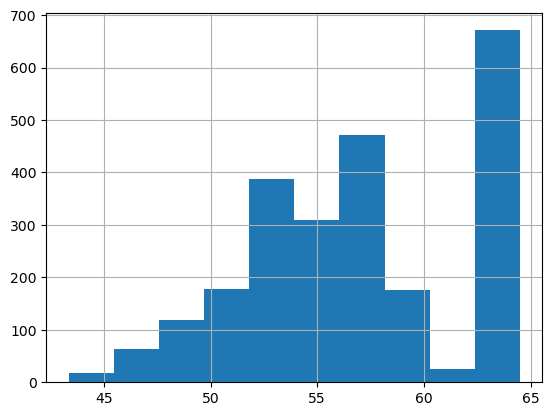

In [39]:
df['% Iron Feed'].hist()

amount of Fe distribution is not normally distributed -> explore more if it affets the performance

<Axes: >

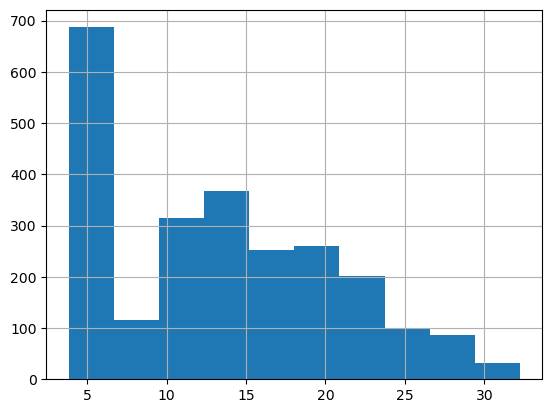

In [40]:
df['% Silica Feed'].hist()

In [ ]:
the same story with silica

<Axes: >

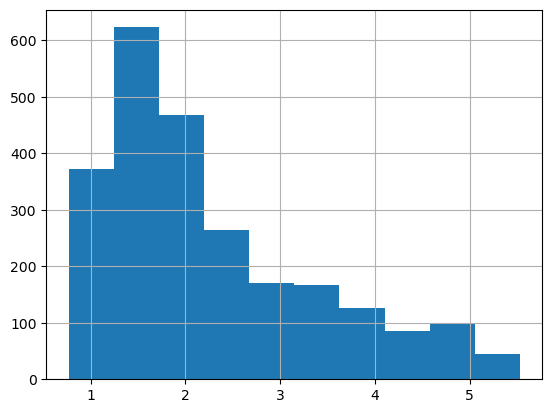

In [43]:
df['% Silica Concentrate'].hist()

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [ ]:
#inconsistent data was dealt with in "unnecessary data section"

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? NO
2. Did the process of cleaning your data give you new insights into your dataset? Gave me insight of data structure and constraints
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? This is data that needs different approch for analysis than what we've learned so far.